![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [325]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [326]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [327]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [7]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [8]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [9]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [27]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [28]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7985512945310876

In [12]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

### Problema de clasificación

In [328]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [15]:
dataTraining_pr = dataTraining.copy()

In [16]:
dataTraining_pr['len_plot'] = dataTraining_pr['plot'].str.len()

In [17]:
dataTraining_pr['len_plot'].max()

9408

In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Asegurarse de tener descargados los recursos necesarios de NLTK
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')

In [330]:
lemmatizer = WordNetLemmatizer()

def lemmatize_as_verb(text):
    words = nltk.word_tokenize(text)
    return [lemmatizer.lemmatize(w, pos='v') for w in words]

In [388]:
# Aplicar técnica de lematización de verbos, quitar palabras de parada, 
# y fijar un máximo de caracteristicas para el diccionario
# USar Tfidf para probar una salida más compacta y discriminativa que CountVectorizer
vectorizer = TfidfVectorizer(tokenizer=lemmatize_as_verb, stop_words='english', max_features=2500, ngram_range = (1,1))

In [389]:
X_dtm = vectorizer.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 2500)

In [390]:
vectorizer.get_feature_names_out()

array(['!', '$', '&', ..., 'youngest', 'youth', 'zombies'], dtype=object)

In [391]:
# Definición de variable de interés (y)
#dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [392]:
output_dim = y_genres.shape[1]
input_dim = X_dtm.shape[1]

In [394]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=3)

#### Clasificador Red neuronal

In [33]:
# Importación librerías
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout
from keras import metrics
from scikeras.wrappers import KerasClassifier 
from keras.callbacks import EarlyStopping
from keras import backend as K
from livelossplot import PlotLossesKeras

In [396]:
# Definición de función que crea una red neuronal a partir de diferentes parámetros (nn_model_params)
# En esta función se consideran 7 parámetos a calibrar, sin embargo se pueden agregar o quitar tantos como lo consideren pertinente
def nn_model_params(optimizer,
                    neurons_1,
                    neurons_2,
                    dropout,
                    batch_size,
                    epochs,
                    activation,
                    patience,
                    loss):
    
    K.clear_session()

    # Definición red neuronal con la función Sequential()
    model = Sequential()
    
    # Definición de las capas de la red con el número de neuronas y la función de activación definidos en la función nn_model_params
    model.add(Dense(neurons_1, input_shape=(input_dim,), activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(neurons_2, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(output_dim, activation='sigmoid'))

    # Definición de función de perdida con parámetros definidos en la función nn_model_params
    model.compile(optimizer = optimizer, loss=loss)

    # Definición de la función EarlyStopping con parámetro definido en la función nn_model_params
    early_stopping = EarlyStopping(monitor="val_loss", patience = patience)

    # Entrenamiento de la red neuronal con parámetros definidos en la función nn_model_params
    model.fit(X_train, y_train_genres,
              validation_data = (X_test, y_test_genres),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping, PlotLossesKeras()],
              verbose=True
              )
     
    return model

In [95]:
# Definición de parámetros y sus valores sobre los que se va a calibrar
nn_params = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'softmax'],
    'model__batch_size': [64, 128],
    'model__neurons_1':[256, 128],
    'model__neurons_2':[128, 64],
    'model__dropout': [0.2, 0.3],
    'model__epochs':[20,50],
    'model__patience': [5],
    'model__loss':['binary_crossentropy']
}

#### Busqueda por GridSearch

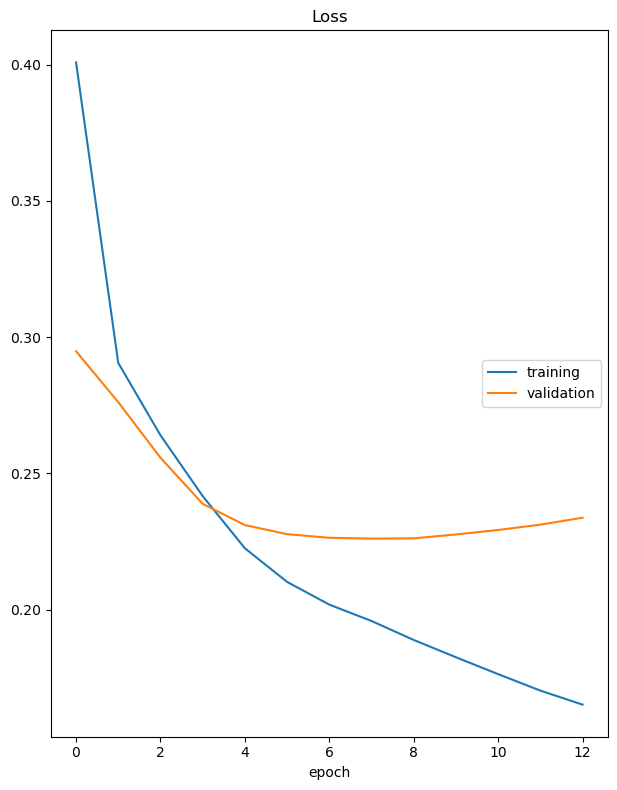

Loss
	training         	 (min:    0.165, max:    0.401, cur:    0.165)
	validation       	 (min:    0.226, max:    0.295, cur:    0.234)
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1617 - val_loss: 0.2337
Los mejores parametros segun Grid Search: {'model__activation': 'relu', 'model__batch_size': 64, 'model__dropout': 0.3, 'model__epochs': 20, 'model__loss': 'binary_crossentropy', 'model__neurons_1': 256, 'model__neurons_2': 128, 'model__optimizer': 'adam', 'model__patience': 5}


In [96]:
from sklearn.model_selection import GridSearchCV

# Definición de red neuronal usando el wrapper KerasRegressor y usando como argumento build_fn en la función nn_model_params
# para más detalles del wrapper puede ingresar al siguiente link https://faroit.com/keras-docs/1.2.2/scikit-learn-api/
nn_model = KerasClassifier(model=nn_model_params, verbose=0)

# Definición método GridSearch para la calibración de parámetros definidos en nn_params
gs = GridSearchCV(nn_model, nn_params, cv=3)
gs.fit(X_train, y_train_genres)

print('Los mejores parametros segun Grid Search:', gs.best_params_)

Utilizando los mejores parámetros del GridSearch

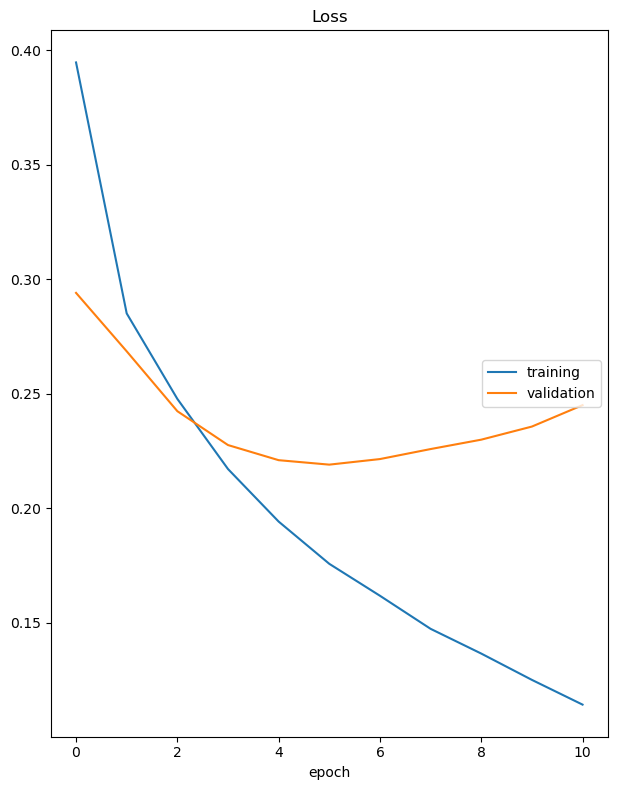

Loss
	training         	 (min:    0.114, max:    0.395, cur:    0.114)
	validation       	 (min:    0.219, max:    0.294, cur:    0.245)
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1111 - val_loss: 0.2450


In [397]:
model = nn_model_params(optimizer = 'adam',
                        neurons_1 = 256,
                        neurons_2 = 128,
                        batch_size=64,
                        dropout = 0.3,
                        epochs=20,
                        activation='relu',
                        patience=5,
                        loss='binary_crossentropy')

In [415]:
# Predicción del modelo de clasificación
y_pred_genres_nn = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres_nn, average='macro')

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.8536336755446449

In [374]:
X_test_dtm = vectorizer.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = model.predict(X_test_dtm)

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [376]:
y_pred_test_genres

array([[1.3393099e-02, 9.0225510e-02, 8.8236816e-03, ..., 6.3837394e-02,
        3.9917324e-03, 1.2352930e-02],
       [5.0457515e-02, 2.5624232e-03, 3.5938137e-04, ..., 2.1370698e-02,
        7.8590073e-02, 9.8390751e-02],
       [1.9053366e-02, 1.2291443e-03, 2.0518668e-05, ..., 6.4962983e-01,
        3.4604155e-04, 1.4204923e-03],
       ...,
       [1.6872530e-04, 4.1313104e-02, 7.8847624e-02, ..., 3.3243594e-04,
        1.4910486e-05, 2.9287257e-04],
       [2.2401762e-01, 9.7026730e-01, 4.4977844e-02, ..., 7.4603120e-03,
        1.2268543e-02, 1.1806883e-02],
       [4.3554696e-01, 6.6879439e-01, 4.9549807e-02, ..., 4.0278164e-01,
        5.2767424e-03, 2.3046632e-03]], dtype=float32)

In [377]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_NN_calibrado_v2.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.013393,0.090226,0.008824,0.005353,0.411207,0.013100,0.000263,0.672604,0.069017,0.437898,...,0.091267,0.045349,0.000465,0.879221,0.027419,0.007965,0.004494,0.063837,0.003992,0.012353
4,0.050458,0.002562,0.000359,0.602038,0.127812,0.223746,0.088713,0.909194,0.001698,0.000572,...,0.005145,0.001318,0.001331,0.115282,0.000310,0.009915,0.144026,0.021371,0.078590,0.098391
5,0.019053,0.001229,0.000021,0.008929,0.086379,0.820604,0.000660,0.798536,0.000373,0.001408,...,0.000326,0.432734,0.000171,0.075323,0.003360,0.000593,0.000857,0.649630,0.000346,0.001420
6,0.019854,0.161594,0.005472,0.042234,0.046460,0.003437,0.002551,0.908215,0.056571,0.086305,...,0.015572,0.105797,0.002030,0.178922,0.059738,0.005860,0.004389,0.200306,0.165524,0.005291
7,0.042365,0.028981,0.003085,0.000532,0.105038,0.008627,0.002933,0.087871,0.003623,0.095265,...,0.001373,0.118407,0.000709,0.091387,0.867334,0.002358,0.000141,0.407452,0.000530,0.001026


In [121]:
import joblib
joblib.dump(model, 'model_project2_v1.pkl', compress=3)

['model_project2_v1.pkl']

### Opción 2 - Modelo LSTM

In [122]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"[Short, Drama]",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"[Comedy, Crime, Horror]",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","[Drama, Film-Noir, Thriller]",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",[Drama],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","[Action, Crime, Thriller]",6.6


In [139]:
dataTraining_pr = dataTraining.copy()
dataTraining_pr['len_plot'] = dataTraining_pr['plot'].str.len()

In [154]:
dataTraining_pr.head()

,year,title,plot,genres,rating,len_plot
3107,2003,Most,most is the story of a single father who takes...,"[Short, Drama]",8.0,1236
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"[Comedy, Crime, Horror]",5.6,94
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","[Drama, Film-Noir, Thriller]",7.2,737
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",[Drama],7.4,2067
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","[Action, Crime, Thriller]",6.6,1027


In [142]:
dataTraining_pr['len_plot'].describe()

count    7895.000000
mean      748.820899
std       494.766799
min         3.000000
25%       412.000000
50%       655.000000
75%       951.500000
max      9408.000000
Name: len_plot, dtype: float64

In [147]:
dataTraining_pr[dataTraining_pr['len_plot'] < 1800].count()

year        7567
title       7567
plot        7567
genres      7567
rating      7567
len_plot    7567
dtype: int64

Si se utilizan 1800 caracteres se está tomando el 95.85% del total de sinopsis, y las restantes quedarían recortadas

In [123]:
X = dataTraining['plot'].tolist()

In [193]:
X

['most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a day before ,  the boy meets a woman boarding a train ,  a drug abuser .  at the bridge ,  the father goes into the engine room ,  and tells his son to stay at the edge of the nearby lake .  a ship comes ,  and the bridge is lifted .  though it is supposed to arrive an hour later ,  the train happens to arrive .  the son sees this ,  and tries to warn his father ,  who is not able to see this .  just as the oncoming train approaches ,  his son falls into the drawbridge gear works while attempting to lower the bridge ,  leaving the father with a horrific choice .  the father then lowers the bridge ,  the gears crushing the boy .  the people in the train are completely oblivious to the fact a boy died trying to save them ,  other than the drug addict woman ,  who happened to look out her train window .  the movie ends ,  with the man wand

In [185]:
X_str = ' '.join(X)
x_voc = set(X_str.split())
x_voc
#voc = set(''.join(X))

{'revolvers',
 'contestant',
 'unfairly',
 'lifeboats',
 'terri',
 'eroica',
 'downsizing',
 'pen',
 'bailed',
 'mongrel',
 'fluke',
 'barbarian',
 'populist',
 'julianne',
 'foal',
 'lbj',
 'displacement',
 'elsinore',
 'donkey',
 'girth',
 'myrtle',
 'looms',
 'landis',
 'really',
 'stealthily',
 'treats',
 'toal',
 'regret',
 'ingiusta',
 'alight',
 'staffa',
 'anonymity',
 'valet',
 'masks',
 'dishonorably',
 'morally',
 'members',
 'undetected',
 'sidney',
 'inadequacy',
 'macoco',
 'lam',
 'janjira',
 'tripitikas',
 'drowning',
 'falcon',
 'observant',
 'walton',
 'colony',
 'brainiac',
 'costly',
 'lavishes',
 'crabs',
 'cabrini',
 'dobson',
 'bialystock',
 'christiane',
 'paragliding',
 'zing',
 'kink',
 'delrio',
 'irena',
 'gleans',
 'idealized',
 'anthill',
 'takahashi',
 'zarno',
 'revenging',
 'dismisses',
 'cables',
 'companionship',
 'gangster',
 'elg',
 'recommendations',
 'verdict',
 'suffering',
 'curvier',
 'aposto',
 'discern',
 'rothenstein',
 'regina',
 'adrien',


In [191]:
import nltk
#nltk.download('stopwords')
english_stopwords = nltk.corpus.stopwords.words('english')
#english_stopwords

In [192]:
vocabulary = {x: idx + 1 for idx, x in enumerate(set(x_voc))}
vocabulary

{'revolvers': 1,
 'contestant': 2,
 'unfairly': 3,
 'lifeboats': 4,
 'terri': 5,
 'eroica': 6,
 'downsizing': 7,
 'pen': 8,
 'bailed': 9,
 'mongrel': 10,
 'fluke': 11,
 'barbarian': 12,
 'populist': 13,
 'julianne': 14,
 'foal': 15,
 'lbj': 16,
 'displacement': 17,
 'elsinore': 18,
 'donkey': 19,
 'girth': 20,
 'myrtle': 21,
 'looms': 22,
 'landis': 23,
 'really': 24,
 'stealthily': 25,
 'treats': 26,
 'toal': 27,
 'regret': 28,
 'ingiusta': 29,
 'alight': 30,
 'staffa': 31,
 'anonymity': 32,
 'valet': 33,
 'masks': 34,
 'dishonorably': 35,
 'morally': 36,
 'members': 37,
 'undetected': 38,
 'sidney': 39,
 'inadequacy': 40,
 'macoco': 41,
 'lam': 42,
 'janjira': 43,
 'tripitikas': 44,
 'drowning': 45,
 'falcon': 46,
 'observant': 47,
 'walton': 48,
 'colony': 49,
 'brainiac': 50,
 'costly': 51,
 'lavishes': 52,
 'crabs': 53,
 'cabrini': 54,
 'dobson': 55,
 'bialystock': 56,
 'christiane': 57,
 'paragliding': 58,
 'zing': 59,
 'kink': 60,
 'delrio': 61,
 'irena': 62,
 'gleans': 63,
 'id

In [260]:
# Definición máximo largo de embedding
max_url_len = 150

# Codificación (embedding) de la URL con el vocabulario definido anteriormente
#X_emb = [x[:max_url_len] for x in X]
X_emb = [[vocabulary[x1] for x1 in x.split() if (x1 in vocabulary.keys()) and (x1 not in english_stopwords)] for x in X]

In [265]:
tamano = [len(x) for x in X_emb]
max(tamano)

960

In [269]:
# Definición de embedding con el largo máximo definido anteriormente
from keras.preprocessing import sequence
X_pad = sequence.pad_sequences(X_emb, maxlen=max_url_len)
X_pad

array([[    0,     0,     0, ..., 28880,  7181, 28194],
       [    0,     0,     0, ...,  1013, 13883, 28194],
       [    0,     0,     0, ..., 29615,  3193, 28194],
       ...,
       [    0,     0,     0, ...,  2132, 18997, 28194],
       [38414,  8620, 38138, ..., 20433, 10908, 28194],
       [    0,     0,     0, ..., 36764, 26388, 28194]])

In [275]:
X_pad.shape

(7895, 150)

In [271]:
# Definición de variable de interés (y)
#dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [272]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_pad, y_genres, test_size=0.33, random_state=3)

In [250]:
from keras.layers import LSTM
from keras.layers import Embedding

In [274]:
output_dim = y_genres.shape[1]
output_dim

24

In [277]:
# Definición red neuronal con la función Sequential()
K.clear_session()
model = Sequential()

# Definición de la capa embedding
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
# Definición de la capa recurrente LSTM
model.add(LSTM(32))
# Definición de dropout para evitar overfitting
#model.add(Dropout(0.3))
# Definición capa densa con función sigmoide para predicción binaria final
model.add(Dense(output_dim, activation='sigmoid'))

# Definición de función de perdida.
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

# Impresión de la arquitectura de la red neuronal
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

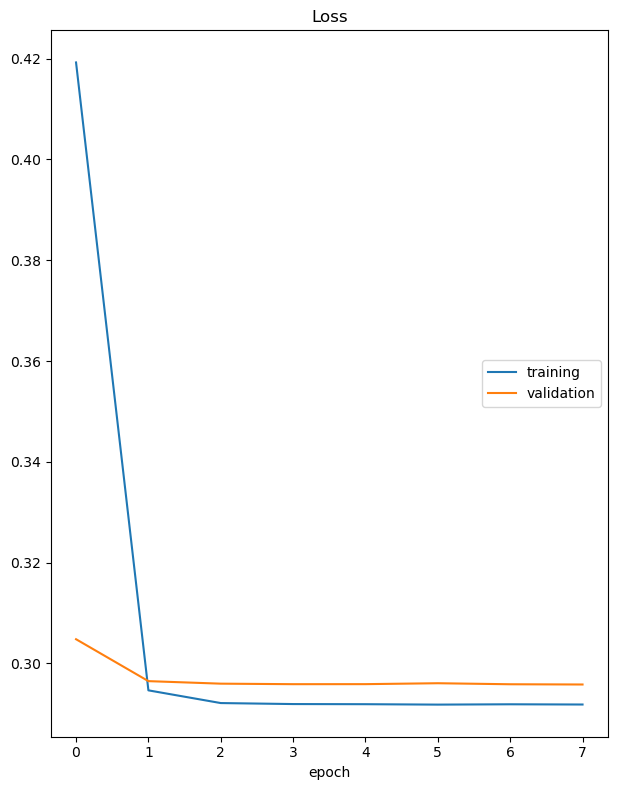

Loss
	training         	 (min:    0.292, max:    0.419, cur:    0.292)
	validation       	 (min:    0.296, max:    0.305, cur:    0.296)
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.2908 - val_loss: 0.2958


In [278]:
# Entrenamiento de la red neuronal usando el set de entrenamiento
model.fit(X_train, y_train_genres, validation_data=(X_test, y_test_genres), 
          batch_size=64, epochs=8, verbose=1,
          callbacks=[PlotLossesKeras()])

In [279]:
# Predicción del modelo de clasificación
y_pred_genres_LSTM = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres_LSTM, average='macro')

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


0.49984405806398097

### Opcion 3 - Cambio en preprocesamiento

In [280]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [281]:
# Dividir en conjuntos de train y test

dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [282]:
# Ajustar las variables predictoras - Dejar todas las variables en minúscula
dataTraining['title'] =  dataTraining['title'].str.lower()
dataTraining['plot'] =  dataTraining['plot'].str.lower()
dataTraining.head()


# dataTesting
dataTesting['title'] = dataTesting['title'].str.lower()
dataTesting['plot'] =  dataTesting['plot'].str.lower()
dataTesting.head()

,year,title,plot
1,1999,message in a bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,midnight express,"the true story of billy hayes , an american c..."
5,1996,primal fear,martin vail left the chicago da ' s office to ...
6,1950,crisis,husband and wife americans dr . eugene and mr...
7,1959,the tingler,the coroner and scientist dr . warren chapin ...


In [283]:
# Limpieza de simbolos, datos númericos y signos de puntuación

import re
import unicodedata

def remove_accents(text):
    # Normalizar el texto para separar los caracteres base de los diacríticos
    nfkd_form = unicodedata.normalize('NFKD', text)
    # Filtrar solo los caracteres base (sin diacríticos)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])


def remove_symbols(text):
    # Usar una expresión regular para eliminar todos los caracteres no alfabéticos y espacios
    return re.sub(r'[^a-zA-Z\s]', '', text)


def clean_text(text):
    text = remove_accents(text)
    text = remove_symbols(text)
    return text

dataTraining['plot'] = dataTraining['plot'].map(lambda x: clean_text(x))
dataTraining['title'] = dataTraining['title'].map(lambda x: clean_text(x))


# dataTesting
dataTesting['plot'] = dataTesting['plot'].map(lambda x: clean_text(x))
dataTesting['title'] = dataTesting['title'].map(lambda x: clean_text(x))

In [284]:
##### Ajustar las palabras en PLOT

from sklearn.feature_extraction.text import TfidfVectorizer

# Crear TfidfVectorizer usando la función personalizada de tokenización y lematización
vectorizer_splem = TfidfVectorizer(tokenizer=lemmatize_as_verb, stop_words='english', max_features=2000)

# Aplicar fit_transform al conjunto de entrenamiento para aprender el vocabulario y transformarlo en vectores de frecuencia.
dataTraining_plot_splem = vectorizer_splem.fit_transform(dataTraining['plot'])

# Aplicar transform al conjunto de test usando el mismo vocabulario.
dataTesting_plot_splem = vectorizer_splem.transform(dataTesting['plot'])

column_names = vectorizer_splem.get_feature_names_out()

In [285]:
##### Ajustar las palabras en TITLE

# Crear TfidfVectorizer usando la función personalizada de tokenización y lematización
vectorizer_splem = TfidfVectorizer(tokenizer=lemmatize_as_verb, stop_words='english', max_features=1000)

# Aplicar fit_transform al conjunto de entrenamiento para aprender el vocabulario y transformarlo en vectores de frecuencia.
dataTraining_title_splem = vectorizer_splem.fit_transform(dataTraining['title'])

# Aplicar transform al conjunto de test usando el mismo vocabulario.
dataTesting_title_splem = vectorizer_splem.transform(dataTesting['title'])

column_names_title = vectorizer_splem.get_feature_names_out()

In [286]:
# dataTraining
df = pd.DataFrame.sparse.from_spmatrix(dataTraining_plot_splem, columns=column_names)
df = df.add_prefix('plot_')
df.head()

# dataTesting
df_test = pd.DataFrame.sparse.from_spmatrix(dataTesting_plot_splem, columns=column_names)
df_test = df_test.add_prefix('plot_')
df_test.head()

,plot_aaron,plot_abandon,plot_abby,plot_abduct,plot_ability,plot_able,plot_aboard,plot_abuse,plot_abusive,plot_academy,...,plot_writer,plot_wrong,plot_wwii,plot_x,plot_year,plot_years,plot_york,plot_young,plot_younger,plot_youth
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.395839,0.0,0.0,0.0,0.0,0.000000,0.0,0.063477,0.0,0.0,...,0.0,0.0,0.0,0.0,0.037319,0.0,0.000000,0.032274,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.089047,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.080364,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [287]:
df1 = pd.DataFrame.sparse.from_spmatrix(dataTraining_title_splem, columns=column_names_title)
df1 = df1.add_prefix('title_')
df1.head()

# dataTesting
df1_test = pd.DataFrame.sparse.from_spmatrix(dataTesting_title_splem, columns=column_names_title)
df1_test = df1_test.add_prefix('title_')
df1_test.head()

,title_abbott,title_aby,title_academy,title_ace,title_act,title_action,title_activity,title_adam,title_adventure,title_affair,...,title_yellow,title_yes,title_york,title_young,title_youre,title_youth,title_zero,title_zombie,title_zombies,title_zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
df_final = pd.concat([dataTraining,df,df1], axis=1)
df_final_test = pd.concat([dataTesting,df_test,df1_test], axis=1)

In [289]:
df_final = df_final[df_final['year'].isna() == False]
df_final_test = df_final_test[df_final_test['year'].isna() == False]

In [290]:
df_final.shape

(7895, 3005)

In [291]:
df_final.drop(columns = ['title','plot'], inplace = True)
df_final.head()

,year,genres,rating,plot_aaron,plot_abandon,plot_abby,plot_abduct,plot_ability,plot_able,plot_aboard,...,title_yellow,title_yes,title_york,title_young,title_youre,title_youth,title_zero,title_zombie,title_zombies,title_zone
3107,2003.0,"['Short', 'Drama']",8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
900,2008.0,"['Comedy', 'Crime', 'Horror']",5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6724,1941.0,"['Drama', 'Film-Noir', 'Thriller']",7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4704,1954.0,['Drama'],7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2582,1990.0,"['Action', 'Crime', 'Thriller']",6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
# dataTesting
df_final_test.drop(columns = ['title','plot'], inplace = True)
df_final_test.head()

,year,plot_aaron,plot_abandon,plot_abby,plot_abduct,plot_ability,plot_able,plot_aboard,plot_abuse,plot_abusive,...,title_yellow,title_yes,title_york,title_young,title_youre,title_youth,title_zero,title_zombie,title_zombies,title_zone
1,1999.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1978.0,0.0,0.0,0.0,0.0,0.0,0.080364,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1996.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1950.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1959.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
# Definición de variable de interés (y)
df_final['genres'] = df_final['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(df_final['genres'])
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [294]:
df_genders = pd.DataFrame(y_genres, columns = le.classes_)
df_genders.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [295]:
df_final = pd.concat([df_final, df_genders], axis=1)
df_final.head()

,year,genres,rating,plot_aaron,plot_abandon,plot_abby,plot_abduct,plot_ability,plot_able,plot_aboard,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
3107,2003.0,"[Short, Drama]",8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
900,2008.0,"[Comedy, Crime, Horror]",5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6724,1941.0,"[Drama, Film-Noir, Thriller]",7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4704,1954.0,[Drama],7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2582,1990.0,"[Action, Crime, Thriller]",6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
df_final = df_final[df_final['year'].isna() == False]
df_final.shape

(7895, 3027)

In [297]:
df_final.head()

,year,genres,rating,plot_aaron,plot_abandon,plot_abby,plot_abduct,plot_ability,plot_able,plot_aboard,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
3107,2003.0,"[Short, Drama]",8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
900,2008.0,"[Comedy, Crime, Horror]",5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6724,1941.0,"[Drama, Film-Noir, Thriller]",7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4704,1954.0,[Drama],7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2582,1990.0,"[Action, Crime, Thriller]",6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
# Separar la base en una base de variables predictoras y otra de variables de respuesta

X = df_final.drop(columns = list(df_genders.columns))
y = df_final[df_genders.columns]


# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split

X_train, X_test, y_train_genres, y_test_genres = train_test_split(X, y, test_size=0.33, random_state=3)

In [302]:
X_train.drop(columns=['genres'], inplace = True)
X_train.head()

,year,rating,plot_aaron,plot_abandon,plot_abby,plot_abduct,plot_ability,plot_able,plot_aboard,plot_abuse,...,title_yellow,title_yes,title_york,title_young,title_youre,title_youth,title_zero,title_zombie,title_zombies,title_zone
8811,2014.0,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,2003.0,6.2,0.0,0.101229,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4710,1992.0,6.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,2010.0,5.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3172,1933.0,6.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
X_test.drop(columns=['genres'], inplace = True)
X_test.head()

,year,rating,plot_aaron,plot_abandon,plot_abby,plot_abduct,plot_ability,plot_able,plot_aboard,plot_abuse,...,title_yellow,title_yes,title_york,title_young,title_youre,title_youth,title_zero,title_zombie,title_zombies,title_zone
8262,1996.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3971,1967.0,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5340,1942.0,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2367,1943.0,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6312,1980.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Modelo de clasificación NN**

In [306]:
output_dim = y_train_genres.shape[1]
input_dim = X_train.shape[1]

In [316]:
X_train.dropna(inplace = True)
y_train_genres.dropna(inplace = True)

In [319]:
X_test.dropna(inplace = True)
y_test_genres.dropna(inplace = True)

In [321]:
# Definición de función que crea una red neuronal a partir de diferentes parámetros (nn_model_params)
# En esta función se consideran 7 parámetos a calibrar, sin embargo se pueden agregar o quitar tantos como lo consideren pertinente
def nn_model_params(optimizer,
                    neurons_1,
                    neurons_2,
                    dropout,
                    batch_size,
                    epochs,
                    activation,
                    patience,
                    loss):
    
    K.clear_session()

    # Definición red neuronal con la función Sequential()
    model = Sequential()
    
    # Definición de las capas de la red con el número de neuronas y la función de activación definidos en la función nn_model_params
    model.add(Dense(neurons_1, input_shape=(input_dim,), activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(neurons_2, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(output_dim, activation='sigmoid'))

    # Definición de función de perdida con parámetros definidos en la función nn_model_params
    model.compile(optimizer = optimizer, loss=loss)

    # Definición de la función EarlyStopping con parámetro definido en la función nn_model_params
    early_stopping = EarlyStopping(monitor="val_loss", patience = patience)

    # Entrenamiento de la red neuronal con parámetros definidos en la función nn_model_params
    model.fit(X_train, y_train_genres,
              validation_data = (X_test, y_test_genres),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping, PlotLossesKeras()],
              verbose=True
              )
     
    return model

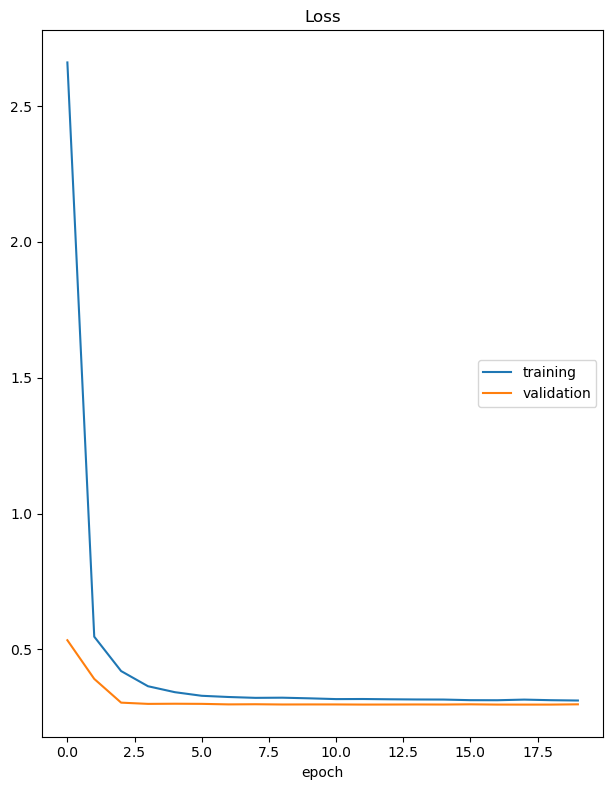

Loss
	training         	 (min:    0.312, max:    2.661, cur:    0.312)
	validation       	 (min:    0.297, max:    0.534, cur:    0.298)
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3120 - val_loss: 0.2980


In [322]:
model = nn_model_params(optimizer = 'adam',
                        neurons_1 = 256,
                        neurons_2 = 128,
                        batch_size=64,
                        dropout = 0.3,
                        epochs=20,
                        activation='relu',
                        patience=5,
                        loss='binary_crossentropy')

In [323]:
# Predicción del modelo de clasificación
y_pred_genres_nn = model.predict(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres_nn, average='macro')

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.5885632126822165